In [41]:

from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [9]:
X, y = make_moons(n_samples=1000, noise=0.4)

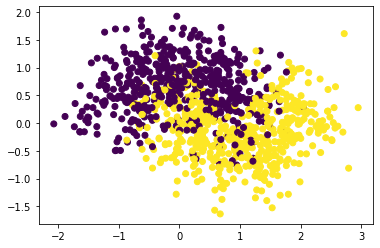

In [20]:
plt.scatter(X[:,0], X[:,1], c=y)

# Split training set

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Train

In [36]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

# Test

In [39]:
y_test_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
accuracy

0.86

# Grid Search for Hyperparameters

In [69]:
params = {"max_depth":[2, 5, 10, 50, 100], 
            "min_samples_split": [2, 5, 10],
            "max_leaf_nodes":[2, 5, 10]}
grid_s = GridSearchCV(model, params, cv=3, scoring="accuracy")
grid_s.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5,
                                              random_state=0),
             param_grid={'max_depth': [2, 5, 10, 50, 100],
                         'max_leaf_nodes': [2, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [70]:
print(grid_s.best_params_)
print(grid_s.best_score_)

{'max_depth': 5, 'max_leaf_nodes': 5, 'min_samples_split': 2}
0.8146666666666667


**Acuracy on test**

In [68]:
model = grid_s.best_estimator_
y_test_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
accuracy

0.88